In [2]:
#呼叫所需套件
import pandas as pd
import numpy as np
import glob
import os
from scipy import stats

In [3]:
type = ['Semi-Conductor 202211', 'Finance 202211', 'Shipping  202211']
path = os.getcwd() + '\\data\\total\\'
print(path)

# loop over the list of xlsx files
# 0 = Semi-Conductor, 1 = Finance, 2 = Shipping
# sample_data = glob.glob(os.path.join(path, "*.xlsx"))
# print("sample_data: ",sample_data)
# for f in sample_data:
#   df = pd.read_xlsx(f)


c:\Users\User\Documents\#tmp\python-\python-webstorm-TEJ-Banking-and-Finance\data\total\


In [29]:
# 呼叫xlsx檔
timeType = ['日','周', '月', '季', '年']
# data2801 = pd.read_excel("path[]hw2_TEJ_excel.xlsx",sheet_name="2357華碩")
# data2498 = pd.read_excel("hw2_TEJ_excel.xlsx",sheet_name="2498宏達電")
# data9999 = pd.read_excel("hw2_TEJ_excel.xlsx",sheet_name="Y9999加權指數")
# file_list = ["2603.xlsx", "2607.xlsx", "2608.xlsx", "2642.xlsx", "5607.xlsx"]
file_list = ["2609"+timeType[0]+ ".xlsx", "2610"+timeType[0]+".xlsx", "2612"+timeType[0]+".xlsx", "Y9999"+timeType[0]+".xlsx"]
# list = ["2603", "2607", "2608", "2642", "5607"]
list = ["2609", "2610", "2612", "Y9999"]
data = [pd.read_excel(os.path.join(path, xlsx_filename)) for xlsx_filename in file_list]
print(data)

[            年月日  開盤價(元)  最高價(元)  最低價(元)    收盤價  成交量(千股)   成交值(千元)    報酬率％  \
0    2022/12/27    65.5    66.2    65.0   65.1    31179   2047147  0.1538   
1    2022/12/26    67.0    67.5    65.0   65.0    51728   3407985 -3.4175   
2    2022/12/23    67.2    67.8    66.5   67.3    57425   3853306 -1.0294   
3    2022/12/22    67.1    68.7    66.6   68.0   150889  10224227  3.5008   
4    2022/12/21    64.7    66.5    64.5   65.7    91137   5986689  2.8169   
..          ...     ...     ...     ...    ...      ...       ...     ...   
242  2022/01/03   120.0   120.5   113.0  114.5   106847  12358012 -5.3719   
243  2021/12/30   124.5   125.0   120.0  121.0    82365  10016129 -2.8112   
244  2021/12/29   126.0   127.0   124.0  124.5    39155   4908882 -0.4000   
245  2021/12/28   124.0   127.0   123.5  125.0    56247   7057509  2.0408   
246  2021/12/27   123.5   124.0   122.0  122.5    21460   2640522  0.0000   

       週轉率％  流通在外股數(千股)  ...    現金股利率  股價漲跌(元)   高低價差%  次日開盤參考價  次日漲停價  次日

In [28]:
# # Create three stock RETURN
# data2357['RETURN']=np.log(data2357.CLOSE) - np.log(data2357.CLOSE.shift(1))
# data2498['RETURN']=np.log(data2498.CLOSE) - np.log(data2498.CLOSE.shift(1))
# data9999['RETURN']=np.log(data9999.CLOSE) - np.log(data9999.CLOSE.shift(1))
column_name = "收盤價"
# print(data[2])
# data[4]['RETURN']=np.log(data[4].loc[:, column_name]) - np.log(data[4].loc[:, column_name].shift(1))
for i in data:
  i['收盤價(元)'] = i['收盤價(元)'].apply(lambda x: unicode(x))
  i['RETURN']=np.log(i.loc[:, column_name]) - np.log(i.loc[:, column_name].shift(1))
  
print(data)
# print(data[0]['RETURN'])

NameError: name 'unicode' is not defined

# Descriptive Statistics

In [219]:

# print(data[0].loc[:, "收盤價(元)"])
# print(data[0].loc[:, "收盤價(元)"].rolling(3).mean())
print(data[0].loc[:, "收盤價(元)"].groupby(data[0].index // 3).mean())

0     154.333333
1     109.933333
2     123.366667
3     130.500000
4     122.166667
         ...    
72     30.433333
73     29.733333
74     26.733333
75     34.766667
76     29.000000
Name: 收盤價(元), Length: 77, dtype: float64


In [220]:
def descriptive_statistics(x) : 
    return pd.Series([x.mean(),x.median(),x.std(),x.var(),
                      x.kurt(),x.skew(),x.min(),x.max(),x.sum(),
                      x.count(),x.quantile(.25), x.quantile(.75)],index=['mean','median',
                      'std','var','kurtosis','skewness','min','max','sum',
                      'count','25%','75%'])
result = []
result_description =  []

for idx in range(len(data)):
  # for semiannual and half year
  result.append(pd.DataFrame(data[idx].loc[:, 'RETURN'].groupby(data[idx].index // 6).mean(),columns=['RETURN']))
  
  # for normal data
  # result.append(pd.DataFrame(data[idx], columns=['RETURN']))
  
  result_description.append(result[idx].apply(descriptive_statistics))

result = pd.concat(result, axis = 1)
result_description = pd.concat(result_description, axis = 1)

result.columns =  list
result_description.columns =  list
result.to_excel("semiannual_return.xlsx")
result_description.to_excel("semiannual_description.xlsx")

# 常見的圖形繪製
# (1)直方圖

In [221]:
#呼叫畫圖的套件，利用matplotlib的pyplot.bar功能
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

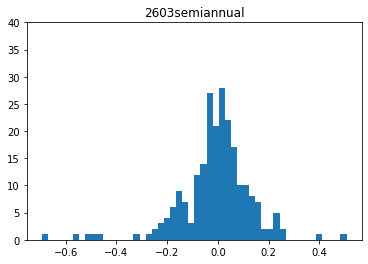

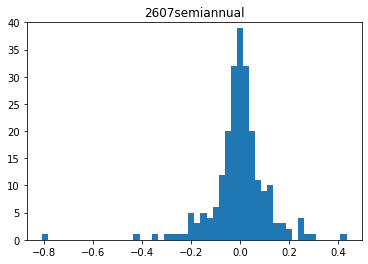

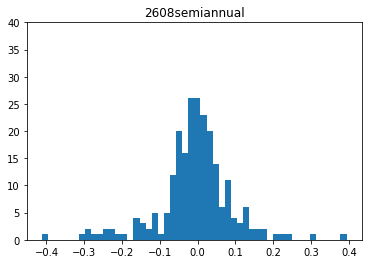

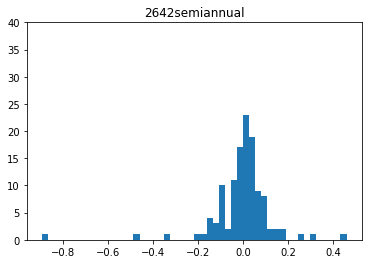

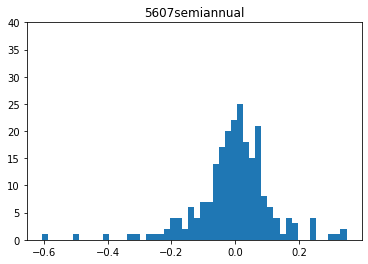

<Figure size 432x288 with 0 Axes>

In [224]:
#第一種直方圖 #單一圖形
unit = "semiannual"
for idx in  range(len(data)):
  plt.hist(data[idx].RETURN, bins= 50)
  # plt.xlim(-0.01,0.01)
  plt.ylim(0,40)
  plt.title(list[idx] + unit)
  plt.savefig("./" + list[idx]+ unit +".png")
  plt.show()
  plt.clf()
  # plt.gca().xaxis.set_major_locator(0.01)
#bins代表直方圖分佈區間個數，range用於設定直方圖的小矩形最大值與最小值

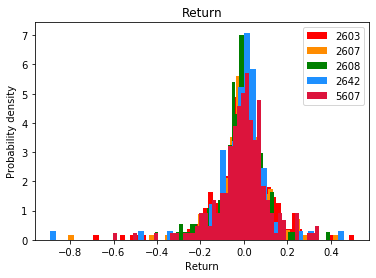

In [223]:
#第三種直方圖 
# plt.hist(result['2357'],bins=50, density=True,label='2357ASUS return',color='r')
# plt.hist(result['2498'],bins=50, density=True,label='2498HTC return',color='g')
# plt.hist(result['9999'],bins=50, density=True,label='9999 return',color='b')
colorType = ['red','darkorange', 'g', 'dodgerblue','crimson']
# print(data[0].RETURN)
for idx in range(len(data)):
  plt.hist(data[idx].RETURN, bins=50, density=True, label=list[idx],color = colorType[idx])
  # plt.xlim(-0.3,0.3)

plt.legend()
plt.xlabel('Return')
plt.ylabel('Probability density')
plt.title("Return")
plt.savefig("./" + unit +".png")